In [16]:
import random
import numpy as np
from data_process import get_CIFAR10_data, get_MUSHROOM_data
from scipy.spatial import distance
# from models import Perceptron, SVM, Softmax, Logistic
from models.svm import SVM
from tqdm import tqdm
import matplotlib.pyplot as plt
# from kaggle_submission import output_submission_csv
%matplotlib inline

# For auto-reloading external modules
# See http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading Mushroom

In the following cells we determine the splitting of the mushroom dataset.
<br /> TRAINING + VALIDATION = 0.8, TESTING = 0.2

In [3]:
TRAINING = 0.6 # indicates 60% of the data is used as the training dataset.
VALIDATION = 0.2

In [4]:
data = get_MUSHROOM_data(VALIDATION)
X_train_MR, y_train_MR = data['X_train'], data['y_train']
X_val_MR, y_val_MR = data['X_val'], data['y_val']
X_test_MR, y_test_MR = data['X_test'], data['y_test']
n_class_MR = len(np.unique(y_test_MR))

print("Number of train samples: ", X_train_MR.shape[0])
print("Number of val samples: ", X_val_MR.shape[0])
print("Number of test samples: ", X_test_MR.shape[0])

Number of train samples:  4874
Number of val samples:  1625
Number of test samples:  1625


### Get Accuracy

This function computes how well your model performs using accuracy as a metric.

In [5]:
def get_acc(pred, y_test):
    return np.sum(y_test == pred) / len(y_test) * 100

# Support Vector Machines (with SGD)

Next, you will implement a "soft margin" SVM. In this formulation you will maximize the margin between positive and negative training examples and penalize margin violations using a hinge loss.

We will optimize the SVM loss using SGD. This means you must compute the loss function with respect to model weights. You will use this gradient to update the model weights.

SVM optimized with SGD has 3 hyperparameters that you can experiment with:
- **Learning rate** - similar to as defined above in Perceptron, this parameter scales by how much the weights are changed according to the calculated gradient update. 
- **Epochs** - similar to as defined above in Perceptron.
- **Regularization constant** - Hyperparameter to determine the strength of regularization. In this case it is a coefficient on the term which maximizes the margin. You could try different values. The default value is set to 0.05.

You will implement the SVM using SGD in the **models/svm.py**

The following code: 
- Creates an instance of the SVM classifier class 
- The train function of the SVM class is trained on the training data
- We use the predict function to find the training accuracy as well as the testing accuracy

## Train SVM on Mushroom

In [10]:
lr = 0.001
n_epochs = 1000
reg_const = 5
N = y_train_MR.shape[0]
# newX = np.append(np.ones(N).reshape(-1,1), X_train_MR, axis=1)
svm_MR = SVM(n_class_MR, lr, n_epochs, reg_const)
svm_MR.train(X_train_MR, y_train_MR)

In [11]:
pred_svm = svm_MR.predict(X_train_MR)
print('The training accuracy is given by: %f' % (get_acc(pred_svm, y_train_MR)))

The training accuracy is given by: 89.433730


In [18]:
lr = 0.001
n_epochs = 1000
reg_consts = np.logspace(-3, 5, 50)
models = [SVM(n_class_MR, lr, n_epochs, r) for r in reg_consts]
for model in tqdm(models): 
    model.train(X_train_MR, y_train_MR)

100%|██████████| 50/50 [01:28<00:00,  1.76s/it]


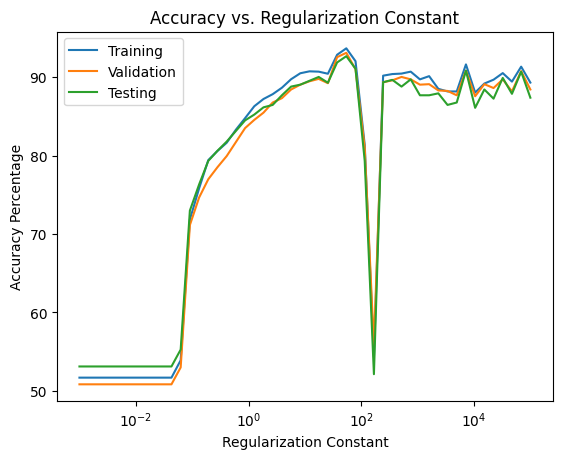

In [20]:
Y_train = [get_acc(model.predict(X_train_MR),  y_train_MR) for model in models]
Y_val = [get_acc(model.predict(X_val_MR),  y_val_MR) for model in models]
Y_test = [get_acc(model.predict(X_test_MR),  y_test_MR) for model in models]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(reg_consts, Y_train, label='Training')
ax.plot(reg_consts, Y_val, label='Validation')
ax.plot(reg_consts, Y_test, label='Testing')
ax.set_xscale('log')
ax.set_xlabel('Regularization Constant')
ax.set_ylabel('Accuracy Percentage')
ax.set_title('Accuracy vs. Regularization Constant')
plt.legend()
plt.show()

In [22]:
lrs = np.logspace(-6, 0, 50)
n_epochs = 1000
reg_const = 50
models = [SVM(n_class_MR, l, n_epochs, reg_const) for l in lrs]
for model in tqdm(models): 
    model.train(X_train_MR, y_train_MR)

 26%|██▌       | 13/50 [00:09<00:27,  1.36it/s]

In [ ]:
Y_train = [get_acc(model.predict(X_train_MR),  y_train_MR) for model in models]
Y_val = [get_acc(model.predict(X_val_MR),  y_val_MR) for model in models]
Y_test = [get_acc(model.predict(X_test_MR),  y_test_MR) for model in models]
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(lrs, Y_train, label='Training')
ax.plot(lrs, Y_val, label='Validation')
ax.plot(lrs, Y_test, label='Testing')
ax.set_xscale('log')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Accuracy Percentage')
ax.set_title('Accuracy vs. Learning Rate')
plt.legend()
plt.show()

### Validate SVM on Mushroom

In [120]:
pred_svm = svm_MR.predict(X_val_MR)
print('The validation accuracy is given by: %f' % (get_acc(pred_svm, y_val_MR)))

The validation accuracy is given by: 89.846154


## Test SVM on Mushroom

In [ ]:
pred_svm = svm_MR.predict(X_test_MR)
print('The testing accuracy is given by: %f' % (get_acc(pred_svm, y_test_MR)))